In [1]:
import pandas as pd
import numpy as np
import re
from scipy.stats import norm
import seaborn as sns

In [2]:
home=pd.read_csv('../Datasets/HomeC.csv')

C:\Users\TDias\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
home.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [4]:
home.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [5]:
home= home.select_dtypes(exclude=['object'])

time = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')  
time = pd.DatetimeIndex(time)
home= home.set_index(time).reset_index()

In [6]:
home.rename(columns={'index':'date'},inplace=True)

# ENERGY

In [7]:
month_lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

In [8]:
energy = home[[ 'date','Dishwasher [kW]','Furnace 1 [kW]', 'Home office [kW]', 'Fridge [kW]','Kitchen 14 [kW]','Microwave [kW]', 'Living room [kW]','gen [kW]']]

In [9]:
energy.rename(columns={col:re.sub(r' \[kW\]','',col) for col in energy.columns[1::]},inplace=True)

C:\Users\TDias\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
energy.rename(columns={'Furnace 1':'Heating','Kitchen 14':'Kitchen'},inplace=True)

In [11]:
energy

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen
0,2016-01-01 05:00:00,0.000033,0.020700,0.442633,0.124150,0.000150,0.004067,0.001517,0.003483
1,2016-01-01 05:01:00,0.000000,0.020717,0.444067,0.124000,0.000150,0.004067,0.001650,0.003467
2,2016-01-01 05:02:00,0.000017,0.020700,0.446067,0.123533,0.000167,0.004067,0.001650,0.003467
3,2016-01-01 05:03:00,0.000017,0.106900,0.446583,0.123133,0.000217,0.004067,0.001617,0.003483
4,2016-01-01 05:04:00,0.000133,0.236933,0.446533,0.122850,0.000333,0.004067,0.001583,0.003467
...,...,...,...,...,...,...,...,...,...
503906,2016-12-16 03:26:00,0.000050,0.104017,0.041750,0.005233,0.000100,0.003800,0.000933,0.003233
503907,2016-12-16 03:27:00,0.000033,0.422383,0.042033,0.004983,0.000067,0.003750,0.001000,0.003217
503908,2016-12-16 03:28:00,0.000050,0.495667,0.042100,0.005333,0.000117,0.003767,0.000950,0.003217
503909,2016-12-16 03:29:00,0.000050,0.494700,0.042100,0.004917,0.000117,0.003767,0.000950,0.003233


In [12]:
energy.isna().sum()

date           0
Dishwasher     1
Heating        1
Home office    1
Fridge         1
Kitchen        1
Microwave      1
Living room    1
gen            1
dtype: int64

In [13]:
energy[energy.isnull().any(axis=1)]

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen
503910,2016-12-16 03:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is the only cell with null values. Since it is not relevant for the purpose of the analysis, I'm going to drop it.

In [14]:
energy.dropna(inplace=True)

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
energy

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen
0,2016-01-01 05:00:00,0.000033,0.020700,0.442633,0.124150,0.000150,0.004067,0.001517,0.003483
1,2016-01-01 05:01:00,0.000000,0.020717,0.444067,0.124000,0.000150,0.004067,0.001650,0.003467
2,2016-01-01 05:02:00,0.000017,0.020700,0.446067,0.123533,0.000167,0.004067,0.001650,0.003467
3,2016-01-01 05:03:00,0.000017,0.106900,0.446583,0.123133,0.000217,0.004067,0.001617,0.003483
4,2016-01-01 05:04:00,0.000133,0.236933,0.446533,0.122850,0.000333,0.004067,0.001583,0.003467
...,...,...,...,...,...,...,...,...,...
503905,2016-12-16 03:25:00,0.000050,0.085267,0.041783,0.005267,0.000150,0.003800,0.000967,0.003183
503906,2016-12-16 03:26:00,0.000050,0.104017,0.041750,0.005233,0.000100,0.003800,0.000933,0.003233
503907,2016-12-16 03:27:00,0.000033,0.422383,0.042033,0.004983,0.000067,0.003750,0.001000,0.003217
503908,2016-12-16 03:28:00,0.000050,0.495667,0.042100,0.005333,0.000117,0.003767,0.000950,0.003217


In [16]:
energy['con']=energy['Dishwasher']+energy['Heating']+energy['Home office']+energy['Fridge']+energy['Kitchen']+energy['Microwave']+energy['Living room']

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
energy['dif']=energy['gen']-energy['con']

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
energy

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen,con,dif
0,2016-01-01 05:00:00,0.000033,0.020700,0.442633,0.124150,0.000150,0.004067,0.001517,0.003483,0.593250,-0.589767
1,2016-01-01 05:01:00,0.000000,0.020717,0.444067,0.124000,0.000150,0.004067,0.001650,0.003467,0.594650,-0.591183
2,2016-01-01 05:02:00,0.000017,0.020700,0.446067,0.123533,0.000167,0.004067,0.001650,0.003467,0.596200,-0.592733
3,2016-01-01 05:03:00,0.000017,0.106900,0.446583,0.123133,0.000217,0.004067,0.001617,0.003483,0.682533,-0.679050
4,2016-01-01 05:04:00,0.000133,0.236933,0.446533,0.122850,0.000333,0.004067,0.001583,0.003467,0.812433,-0.808967
...,...,...,...,...,...,...,...,...,...,...,...
503905,2016-12-16 03:25:00,0.000050,0.085267,0.041783,0.005267,0.000150,0.003800,0.000967,0.003183,0.137283,-0.134100
503906,2016-12-16 03:26:00,0.000050,0.104017,0.041750,0.005233,0.000100,0.003800,0.000933,0.003233,0.155883,-0.152650
503907,2016-12-16 03:27:00,0.000033,0.422383,0.042033,0.004983,0.000067,0.003750,0.001000,0.003217,0.474250,-0.471033
503908,2016-12-16 03:28:00,0.000050,0.495667,0.042100,0.005333,0.000117,0.003767,0.000950,0.003217,0.547983,-0.544767


#### TRANSFORM IN DAILY 

In [19]:
energy.index=energy['date']
energy=energy.resample('H').sum().reset_index()
energy

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen,con,dif
0,2016-01-01 05:00:00,0.003817,8.077850,14.508850,2.271667,0.012350,1.299100,0.090283,0.198417,26.263917,-26.065501
1,2016-01-01 06:00:00,0.005950,14.194200,2.597617,4.531317,0.010866,0.252967,0.097083,0.205300,21.690000,-21.484700
2,2016-01-01 07:00:00,0.002550,5.965467,2.604967,3.569133,0.008033,0.254733,0.097717,0.206900,12.502601,-12.295700
3,2016-01-01 08:00:00,0.008300,22.509200,3.900833,3.624717,0.010600,0.256450,0.098067,0.206850,30.408167,-30.201317
4,2016-01-01 09:00:00,0.003617,9.180000,2.603500,2.106350,0.007484,0.255467,0.099000,0.206350,14.255417,-14.049067
...,...,...,...,...,...,...,...,...,...,...,...
8394,2016-12-15 23:00:00,0.004500,17.168133,2.511183,2.654150,0.010067,0.185067,0.075633,0.248250,22.608733,-22.360483
8395,2016-12-16 00:00:00,0.003568,17.836333,2.502683,3.029500,0.005717,0.180050,0.074133,0.246533,23.631985,-23.385451
8396,2016-12-16 01:00:00,0.006000,20.452367,2.515267,2.948417,0.010867,0.186267,0.076550,0.248483,26.195734,-25.947250
8397,2016-12-16 02:00:00,0.005117,16.342867,2.513983,3.003783,0.010033,0.186633,0.076183,0.249867,22.138600,-21.888734


In [20]:
energy.head(60)

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen,con,dif
0,2016-01-01 05:00:00,0.003817,8.077850,14.508850,2.271667,0.012350,1.299100,0.090283,0.198417,26.263917,-26.065501
1,2016-01-01 06:00:00,0.005950,14.194200,2.597617,4.531317,0.010866,0.252967,0.097083,0.205300,21.690000,-21.484700
2,2016-01-01 07:00:00,0.002550,5.965467,2.604967,3.569133,0.008033,0.254733,0.097717,0.206900,12.502601,-12.295700
3,2016-01-01 08:00:00,0.008300,22.509200,3.900833,3.624717,0.010600,0.256450,0.098067,0.206850,30.408167,-30.201317
4,2016-01-01 09:00:00,0.003617,9.180000,2.603500,2.106350,0.007484,0.255467,0.099000,0.206350,14.255417,-14.049067
5,2016-01-01 10:00:00,0.004333,21.653600,2.594283,3.079683,0.008267,0.255083,0.097267,0.205550,27.692517,-27.486967
6,2016-01-01 11:00:00,0.005034,10.546683,2.596050,3.561617,0.011283,0.252717,0.096383,0.205350,17.069767,-16.864417
7,2016-01-01 12:00:00,0.005234,12.383650,2.569950,2.923450,0.007100,0.255317,0.095600,0.205133,18.240301,-18.035167
8,2016-01-01 13:00:00,0.000367,1.233083,2.506683,2.656683,0.001934,0.252367,0.093717,0.389050,6.744834,-6.355784
9,2016-01-01 14:00:00,0.003867,7.656867,2.503300,1.603217,4.829483,0.836217,18.910517,6.891967,36.343467,-29.451500


In [21]:
energy['month']= pd.DatetimeIndex(energy['date']).month
energy['day']=pd.DatetimeIndex(energy['date']).day
energy['time']=pd.DatetimeIndex(energy['date']).time
energy.head(60)

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen,con,dif,month,day,time
0,2016-01-01 05:00:00,0.003817,8.077850,14.508850,2.271667,0.012350,1.299100,0.090283,0.198417,26.263917,-26.065501,1,1,05:00:00
1,2016-01-01 06:00:00,0.005950,14.194200,2.597617,4.531317,0.010866,0.252967,0.097083,0.205300,21.690000,-21.484700,1,1,06:00:00
2,2016-01-01 07:00:00,0.002550,5.965467,2.604967,3.569133,0.008033,0.254733,0.097717,0.206900,12.502601,-12.295700,1,1,07:00:00
3,2016-01-01 08:00:00,0.008300,22.509200,3.900833,3.624717,0.010600,0.256450,0.098067,0.206850,30.408167,-30.201317,1,1,08:00:00
4,2016-01-01 09:00:00,0.003617,9.180000,2.603500,2.106350,0.007484,0.255467,0.099000,0.206350,14.255417,-14.049067,1,1,09:00:00
5,2016-01-01 10:00:00,0.004333,21.653600,2.594283,3.079683,0.008267,0.255083,0.097267,0.205550,27.692517,-27.486967,1,1,10:00:00
6,2016-01-01 11:00:00,0.005034,10.546683,2.596050,3.561617,0.011283,0.252717,0.096383,0.205350,17.069767,-16.864417,1,1,11:00:00
7,2016-01-01 12:00:00,0.005234,12.383650,2.569950,2.923450,0.007100,0.255317,0.095600,0.205133,18.240301,-18.035167,1,1,12:00:00
8,2016-01-01 13:00:00,0.000367,1.233083,2.506683,2.656683,0.001934,0.252367,0.093717,0.389050,6.744834,-6.355784,1,1,13:00:00
9,2016-01-01 14:00:00,0.003867,7.656867,2.503300,1.603217,4.829483,0.836217,18.910517,6.891967,36.343467,-29.451500,1,1,14:00:00


In [22]:
energy.to_csv('../Datasets/energy.csv')

In [23]:
num_days=list((energy.groupby(['month','day']).size().reset_index()).groupby('month').size().values)
num_days

[31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 16]

In [24]:
energy_month=[energy[energy['month']==i].reset_index(drop=True) for i in range(1,13)]
energy_month[0]

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen,con,dif,month,day,time
0,2016-01-01 05:00:00,0.003817,8.077850,14.508850,2.271667,0.012350,1.299100,0.090283,0.198417,26.263917,-26.065501,1,1,05:00:00
1,2016-01-01 06:00:00,0.005950,14.194200,2.597617,4.531317,0.010866,0.252967,0.097083,0.205300,21.690000,-21.484700,1,1,06:00:00
2,2016-01-01 07:00:00,0.002550,5.965467,2.604967,3.569133,0.008033,0.254733,0.097717,0.206900,12.502601,-12.295700,1,1,07:00:00
3,2016-01-01 08:00:00,0.008300,22.509200,3.900833,3.624717,0.010600,0.256450,0.098067,0.206850,30.408167,-30.201317,1,1,08:00:00
4,2016-01-01 09:00:00,0.003617,9.180000,2.603500,2.106350,0.007484,0.255467,0.099000,0.206350,14.255417,-14.049067,1,1,09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2016-01-31 19:00:00,0.003734,9.864233,2.426550,6.059817,2.353283,1.109450,3.963617,1.148050,25.780684,-24.632634,1,31,19:00:00
735,2016-01-31 20:00:00,0.002101,6.624300,2.420650,7.850200,0.008650,0.240750,5.833833,0.957067,22.980484,-22.023417,1,31,20:00:00
736,2016-01-31 21:00:00,0.019017,29.454283,2.443017,8.251517,0.022483,1.248050,5.864517,0.899633,47.302884,-46.403250,1,31,21:00:00
737,2016-01-31 22:00:00,0.001251,4.625067,2.534983,7.709850,0.004216,4.575600,5.889600,0.176517,25.340567,-25.164050,1,31,22:00:00


In [25]:
gen_month=[element[['month','day','time','gen','con']] for element in energy_month]
gen_month[11]

,month,day,time,gen,con
0,12,1,00:00:00,0.259300,31.254101
1,12,1,01:00:00,0.259150,44.414034
2,12,1,02:00:00,0.246367,42.518867
3,12,1,03:00:00,0.243583,29.783801
4,12,1,04:00:00,0.259567,11.790550
...,...,...,...,...,...
359,12,15,23:00:00,0.248250,22.608733
360,12,16,00:00:00,0.246533,23.631985
361,12,16,01:00:00,0.248483,26.195734
362,12,16,02:00:00,0.249867,22.138600


In [26]:
for element in gen_month:
    print (max(element['day']))

31
29
31
30
31
30
31
31
30
31
30
16


In [27]:
gen_day=[element[element['day']==i] for element in gen_month for i in range(1,max(element['day']+1))]

# CONFIDENCE INTERVALS FULL DAY

In [28]:
def conf_intervals(mom):
    interval=[]
    for i in range(0,12):
        mean=np.mean(gen_month[i].groupby(['month','day']).sum()[mom])
        sigma=np.std(gen_month[i].groupby(['month','day']).sum()[mom])
        interval.append(norm.interval(0.90, loc=mean,scale=sigma))
    return interval    

In [29]:
conf_intervals('gen')

[(9.814434362924757, 157.70591833468808),
 (-14.732179329863314, 201.23022760393226),
 (42.63043286928165, 202.26036498329893),
 (6.0891324845491255, 253.47986416571752),
 (23.736301123760356, 213.08383114069122),
 (80.52916162672086, 219.21601726527905),
 (68.21035900079904, 195.83899908300737),
 (67.78657089322533, 202.69903016645208),
 (48.21283331090315, 184.21100337089678),
 (9.161679518025991, 145.61755491242565),
 (-3.2199249192010484, 153.49944717246768),
 (-8.668168957460885, 112.52132310658587)]

In [30]:
conf_intervals('con')

[(481.74425044716696, 847.8775618977357),
 (374.72927208241816, 865.2885170309612),
 (322.7714217434257, 654.9469805515419),
 (243.2318468761975, 658.5414641077359),
 (107.36369452316, 577.4342508856141),
 (220.14128518557948, 466.12221196762056),
 (231.9020635462871, 640.5691992075838),
 (262.77677757585144, 724.9658029537611),
 (248.34226951425993, 540.4438154719398),
 (211.9844248192038, 589.0421055127961),
 (297.64348517019397, 729.1205602707394),
 (269.4772750305589, 854.7678216710658)]

# CONFIDENCE INTERVALS FROM 14:00 to 19:00

In [31]:
energy[energy['dif']>0]

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen,con,dif,month,day,time
35,2016-01-02 16:00:00,0.005800,12.494083,2.950933,2.176467,0.008300,0.257367,0.086450,22.039333,17.979400,4.059933,1,2,16:00:00
36,2016-01-02 17:00:00,0.006200,12.809767,2.951783,2.231533,0.008400,0.252517,1.346133,21.274783,19.606334,1.668450,1,2,17:00:00
86,2016-01-04 19:00:00,0.004717,9.437567,3.965850,0.342083,1.209100,1.701183,0.095000,17.647667,16.755501,0.892165,1,4,19:00:00
107,2016-01-05 16:00:00,0.009350,21.926267,2.439100,0.299250,0.013350,0.249483,0.091983,26.507767,25.028783,1.478983,1,5,16:00:00
108,2016-01-05 17:00:00,0.007167,14.982600,2.439700,5.250733,0.008384,0.251167,0.089000,26.240650,23.028751,3.211899,1,5,17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2016-12-04 16:00:00,0.013417,9.370350,2.423783,3.598600,0.007950,0.187683,0.086267,23.160350,15.688050,7.472300,12,4,16:00:00
8124,2016-12-04 17:00:00,0.013733,7.401233,2.428183,2.317933,0.004717,0.188133,0.087450,22.520033,12.441384,10.078649,12,4,17:00:00
8125,2016-12-04 18:00:00,0.004617,6.013133,2.422483,1.638350,3.442817,0.193417,0.088033,19.762033,13.802850,5.959183,12,4,18:00:00
8126,2016-12-04 19:00:00,0.000651,2.251350,2.386483,4.124617,0.028900,0.188450,0.092933,14.872783,9.073384,5.799399,12,4,19:00:00


In [32]:
data=(energy.set_index('date').between_time('14:00','19:00')).reset_index()

In [33]:
data.head(40)

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen,con,dif,month,day,time
0,2016-01-01 14:00:00,0.003867,7.656867,2.503300,1.603217,4.829483,0.836217,18.910517,6.891967,36.343467,-29.451500,1,1,14:00:00
1,2016-01-01 15:00:00,0.006383,17.171800,2.491017,2.628467,0.010683,0.253817,20.027233,3.094450,42.589400,-39.494950,1,1,15:00:00
2,2016-01-01 16:00:00,0.006784,11.779483,5.682833,7.272117,0.015800,1.707633,8.705050,1.123267,35.169700,-34.046434,1,1,16:00:00
3,2016-01-01 17:00:00,0.006117,11.203817,2.479183,7.103583,0.012583,0.247733,6.045317,1.222767,27.098334,-25.875567,1,1,17:00:00
4,2016-01-01 18:00:00,0.015200,26.717750,2.492933,6.823167,5.313583,1.666000,5.974933,1.619417,49.003567,-47.384150,1,1,18:00:00
5,2016-01-01 19:00:00,29.262150,2.525800,2.488467,7.005850,0.615783,0.246550,2.028067,1.300900,44.172667,-42.871767,1,1,19:00:00
6,2016-01-02 14:00:00,0.003434,6.041917,2.924533,0.646517,0.007533,0.256333,0.081733,3.131150,9.962000,-6.830850,1,2,14:00:00
7,2016-01-02 15:00:00,0.009234,21.406100,2.959550,4.193550,0.011767,0.253417,0.083617,13.919200,28.917234,-14.998034,1,2,15:00:00
8,2016-01-02 16:00:00,0.005800,12.494083,2.950933,2.176467,0.008300,0.257367,0.086450,22.039333,17.979400,4.059933,1,2,16:00:00
9,2016-01-02 17:00:00,0.006200,12.809767,2.951783,2.231533,0.008400,0.252517,1.346133,21.274783,19.606334,1.668450,1,2,17:00:00


In [34]:
month_15_19=[data[data['month']==i].reset_index(drop=True) for i in range(1,13)]
gen_month=[element[['month','day','time','gen','con','dif']] for element in month_15_19]

In [35]:
gen_month[1]

,month,day,time,gen,con,dif
0,2,1,14:00:00,14.529067,11.530218,2.998849
1,2,1,15:00:00,8.922900,8.131351,0.791549
2,2,1,16:00:00,2.409867,10.939884,-8.530018
3,2,1,17:00:00,9.591400,9.586751,0.004649
4,2,1,18:00:00,5.381383,11.168517,-5.787134
...,...,...,...,...,...,...
169,2,29,15:00:00,0.847567,15.548384,-14.700817
170,2,29,16:00:00,1.503550,12.236884,-10.733334
171,2,29,17:00:00,4.647467,14.064734,-9.417268
172,2,29,18:00:00,10.347817,15.436551,-5.088734


In [36]:
def conf_intervals(mom):
    interval=[]
    for i in range(0,12):
        mean=np.mean(gen_month[i].groupby(['month','day']).sum()[mom])
        sigma=np.std(gen_month[i].groupby(['month','day']).sum()[mom])
        interval.append(norm.interval(0.90, loc=mean,scale=sigma))
    return interval    

In [37]:
conf_intervals('dif')

[(-210.1049666140649, 22.982877328903527),
 (-175.07425782078914, 48.94461601009946),
 (-115.98759158759354, 92.66030526288384),
 (-157.910366769468, 133.92353990933464),
 (-130.41044280612473, 117.98586281638275),
 (-35.796830130758906, 93.79977286895885),
 (-111.27325171490469, 77.04544207167883),
 (-133.5287346411852, 82.65184116079806),
 (-114.24832820045681, 83.93259666232345),
 (-125.1706947171945, 57.68898998629123),
 (-179.33390832824483, 74.6910950486448),
 (-188.72162914667453, 14.361529448941184)]

In [38]:
x=conf_intervals('gen')
x

[(5.883945220041468, 142.26561607176495),
 (-18.07144128839448, 173.51855967267028),
 (31.190004778350755, 163.64082210203637),
 (0.8136965541554417, 187.90903344071117),
 (11.669613478566845, 154.44115104504604),
 (53.74884905375557, 164.32179760991102),
 (47.92859102358593, 146.2022100508657),
 (45.18626110341919, 153.13837868451628),
 (36.384580967810955, 147.821854586189),
 (1.5920448135177452, 129.98274873177257),
 (-7.985256730664588, 138.8136434027312),
 (-7.555283466706747, 102.40199458177341)]

In [39]:
y=conf_intervals('con')

In [40]:
df_gen = pd.DataFrame(x, columns=['lower_limit', 'higher_limit'])
df_gen['month']=month_lst
df_gen=df_gen[['month','lower_limit','higher_limit']]
df_gen.to_csv('../Datasets/confinterval_gen_14_19.csv')

In [41]:
df_con = pd.DataFrame(y, columns=['lower_limit', 'higher_limit'])
df_con['month']=month_lst
df_con=df_con[['month','lower_limit','higher_limit']]
df_con.to_csv('../Datasets/confinterval_con_14_19.csv')

In [42]:
sample=gen_month[5].groupby(['month','day']).sum()

In [43]:
sample.describe()

,gen,con,dif
count,30.000000,30.000000,30.000000
mean,109.035323,80.033852,29.001471
std,34.186392,30.871233,40.068030
min,15.333433,41.124653,-46.402886
25%,101.848879,55.858821,1.783118
50%,122.870258,74.851238,30.244729
75%,129.516275,108.448362,63.080383
max,144.812700,144.704537,99.928727


In [44]:
from scipy.stats import ttest_ind

ttest_ind(sample.gen, sample.con, equal_var=True)

Ttest_indResult(statistic=3.4485325518896435, pvalue=0.0010561861517869094)

In [45]:
from scipy.stats import ttest_1samp

ttest_1samp(sample.dif,0)

Ttest_1sampResult(statistic=3.964447450570864, pvalue=0.00044057572990832927)

In [46]:
stats={month_lst[i]:(ttest_ind(gen_month[i].groupby(['month','day']).sum().gen, gen_month[i].groupby(['month','day']).sum().con,equal_var=True)[0],(ttest_ind(gen_month[i].groupby(['month','day']).sum().gen, gen_month[i].groupby(['month','day']).sum().con,equal_var=True)[1])) for i in range(0,12)}

In [47]:
stats

{'January': (-7.384313186984297, 5.52047071187498e-10),
 'February': (-4.0696422444818525, 0.00014915493264587806),
 'March': (-1.0880778421133679, 0.2809121917121864),
 'April': (-0.8370599520239593, 0.4059947144560433),
 'May': (-0.5045592754417744, 0.61571648363665),
 'June': (3.4485325518896435, 0.0010561861517869094),
 'July': (-1.6100477958966475, 0.11263659359911377),
 'August': (-2.1652233470166626, 0.03435751100641274),
 'September': (-1.3269520383992264, 0.18972501692064433),
 'October': (-3.198358273766086, 0.0022079662163320217),
 'November': (-3.960344905362101, 0.00020711944820961712),
 'December': (-5.574892352800231, 5.778759322362888e-06)}

In [48]:
df_stats = pd.DataFrame.from_dict(stats, orient='index').reset_index()
df_stats.columns = ['month','statistic','p-value']

In [49]:
df_stats.to_csv('../Datasets/stats_14_19.csv')

# CONFIDENCE INTERVALS BETWEEN  11:00 AND 15:00  

In [50]:
data=(energy.set_index('date').between_time('11:00','15:00')).reset_index()
month_15_19=[data[data['month']==i].reset_index(drop=True) for i in range(1,13)]
gen_month=[element[['month','day','time','gen','con','dif']] for element in month_15_19]

In [51]:
def conf_intervals(mom):
    interval=[]
    for i in range(0,12):
        mean=np.mean(gen_month[i].groupby(['month','day']).sum()[mom])
        sigma=np.std(gen_month[i].groupby(['month','day']).sum()[mom])
        interval.append(norm.interval(0.90, loc=mean,scale=sigma))
    return interval 

In [52]:
conf_intervals('gen')

[(2.9803764444398233, 46.3536902385279),
 (-2.539086468555123, 60.74102325793443),
 (2.9044510626912867, 69.10796829808288),
 (-3.6489404063137556, 102.18689150804707),
 (3.396805389236583, 86.96523977456985),
 (29.883255444670933, 79.08902233492908),
 (23.62936027496533, 70.4491311248411),
 (22.203654176586333, 74.15142968889752),
 (7.531648992970219, 68.33316657182976),
 (4.586283962260435, 52.67625691928794),
 (-3.4779699974716394, 55.98463557013831),
 (-2.9126362723479566, 39.91102071874795)]

In [53]:
conf_intervals('con')

[(79.6541389643662, 222.66097129389186),
 (76.12800927768704, 202.65573851851985),
 (60.807103357393515, 168.0464832175742),
 (57.288283925787965, 179.88713273034534),
 (5.998725212815216, 166.65681676292672),
 (42.856513697740354, 102.57538995259299),
 (41.01911080273661, 151.34274221145688),
 (41.53893656629313, 181.25210995867457),
 (34.856685652123055, 151.01543995794358),
 (37.177318290669234, 165.3916266415888),
 (65.70202461067893, 185.14152494805438),
 (71.5552514500134, 156.71798443811994)]

In [54]:
sample=gen_month[0].groupby(['month','day']).sum()

In [55]:
ttest_ind(sample.gen, sample.con, equal_var=True)

Ttest_indResult(statistic=-15.251414512229365, pvalue=2.60107932596394e-22)

In [56]:
stats={month_lst[i]:(ttest_ind(gen_month[i].groupby(['month','day']).sum().gen, gen_month[i].groupby(['month','day']).sum().con,equal_var=True)[0],(ttest_ind(gen_month[i].groupby(['month','day']).sum().gen, gen_month[i].groupby(['month','day']).sum().con,equal_var=True)[1])) for i in range(0,12)}

In [57]:
stats

{'January': (-15.251414512229365, 2.60107932596394e-22),
 'February': (-13.571034182786667, 2.3762760170747395e-19),
 'March': (-11.211896508310964, 2.3562520744877854e-16),
 'April': (-7.582172121756292, 3.0796461781090817e-10),
 'May': (-4.094034824962292, 0.00012867531144729563),
 'June': (-4.173628854644472, 0.00010174692530394818),
 'July': (-7.388211863935358, 5.436424139661645e-10),
 'August': (-7.641923362354518, 2.003059928237353e-10),
 'September': (-7.432140233976458, 5.504425915701258e-10),
 'October': (-9.559914381216009, 1.1418745364568802e-13),
 'November': (-13.167407462481586, 4.493214040268399e-19),
 'December': (-12.34950293794349, 7.54486945670095e-13)}

# CONFIDENCE INTERVALS BETWEEN 15:00 AND 16:00

In [58]:
data=(energy.set_index('date').between_time('15:00','17:00')).reset_index()
month_15_19=[data[data['month']==i].reset_index(drop=True) for i in range(1,13)]
gen_month=[element[['month','day','time','gen','con','dif']] for element in month_15_19]

In [59]:
def conf_intervals(mom):
    interval=[]
    for i in range(0,12):
        mean=np.mean(gen_month[i].groupby(['month','day']).sum()[mom])
        sigma=np.std(gen_month[i].groupby(['month','day']).sum()[mom])
        interval.append(norm.interval(0.90, loc=mean,scale=sigma))
    return interval 

In [60]:
conf_intervals('gen')

[(2.844886741275616, 85.10903153833729),
 (-11.591297265703709, 97.0391558860485),
 (14.977597429435782, 91.42508966753195),
 (-0.6839434302743612, 103.66328787707432),
 (7.641130257406488, 84.92886651846445),
 (28.50098457063336, 89.14359987309997),
 (26.836708839812555, 80.03629223580035),
 (24.482265909727197, 82.18465667182117),
 (19.63834454175898, 80.46850767970766),
 (1.042519024007376, 80.44861538625068),
 (-6.1305340195212, 80.16325624525452),
 (-4.786521977421081, 59.70010419288774)]

In [61]:
conf_intervals('con')

[(34.98099175912051, 139.22425757546011),
 (20.481451934714848, 126.92848435742306),
 (8.790978602082554, 99.5608191510787),
 (2.7930556419234804, 108.23333267014317),
 (-1.1033187044550559, 91.0117031051002),
 (5.689155018007227, 83.11541686005941),
 (13.094467926142585, 95.67339569334128),
 (10.02113052739086, 114.30638826170589),
 (2.0924102918612917, 100.01287820547202),
 (9.185239707083852, 100.49601422285161),
 (5.88584560915514, 114.6721954245115),
 (24.086543145814964, 112.201161796585)]

In [62]:
stats={month_lst[i]:(ttest_ind(gen_month[i].groupby(['month','day']).sum().gen, gen_month[i].groupby(['month','day']).sum().con,equal_var=True)[0],(ttest_ind(gen_month[i].groupby(['month','day']).sum().gen, gen_month[i].groupby(['month','day']).sum().con,equal_var=True)[1])) for i in range(0,12)}

In [63]:
stats

{'January': (-5.85164109146952, 2.1707552070734465e-07),
 'February': (-3.545928005945922, 0.0007987982930400592),
 'March': (-0.14796904968022323, 0.8828633445321314),
 'April': (-0.4804985735244546, 0.6326803762778426),
 'May': (0.19942059100299522, 0.8426080492172936),
 'June': (2.5975004781327518, 0.01188260412861923),
 'July': (-0.17378558611076902, 0.8626189821375001),
 'August': (-1.3349743408109656, 0.18692812553787877),
 'September': (-0.1535588581215764, 0.8784906140861656),
 'October': (-2.0987948143103234, 0.040051979857572674),
 'November': (-2.9679039614560576, 0.004351785111736894),
 'December': (-4.586591756623559, 8.581485548167175e-05)}

# CONFIDENCE INTERVALS 15:00 AND 19:00 WITHOUT HEATING

In [64]:
energy['con']=energy['con']-energy['Heating']

In [65]:
energy.head(40)

,date,Dishwasher,Heating,Home office,Fridge,Kitchen,Microwave,Living room,gen,con,dif,month,day,time
0,2016-01-01 05:00:00,0.003817,8.077850,14.508850,2.271667,0.012350,1.299100,0.090283,0.198417,18.186067,-26.065501,1,1,05:00:00
1,2016-01-01 06:00:00,0.005950,14.194200,2.597617,4.531317,0.010866,0.252967,0.097083,0.205300,7.495800,-21.484700,1,1,06:00:00
2,2016-01-01 07:00:00,0.002550,5.965467,2.604967,3.569133,0.008033,0.254733,0.097717,0.206900,6.537134,-12.295700,1,1,07:00:00
3,2016-01-01 08:00:00,0.008300,22.509200,3.900833,3.624717,0.010600,0.256450,0.098067,0.206850,7.898967,-30.201317,1,1,08:00:00
4,2016-01-01 09:00:00,0.003617,9.180000,2.603500,2.106350,0.007484,0.255467,0.099000,0.206350,5.075417,-14.049067,1,1,09:00:00
5,2016-01-01 10:00:00,0.004333,21.653600,2.594283,3.079683,0.008267,0.255083,0.097267,0.205550,6.038917,-27.486967,1,1,10:00:00
6,2016-01-01 11:00:00,0.005034,10.546683,2.596050,3.561617,0.011283,0.252717,0.096383,0.205350,6.523084,-16.864417,1,1,11:00:00
7,2016-01-01 12:00:00,0.005234,12.383650,2.569950,2.923450,0.007100,0.255317,0.095600,0.205133,5.856651,-18.035167,1,1,12:00:00
8,2016-01-01 13:00:00,0.000367,1.233083,2.506683,2.656683,0.001934,0.252367,0.093717,0.389050,5.511751,-6.355784,1,1,13:00:00
9,2016-01-01 14:00:00,0.003867,7.656867,2.503300,1.603217,4.829483,0.836217,18.910517,6.891967,28.686600,-29.451500,1,1,14:00:00


In [66]:
data=(energy.set_index('date').between_time('14:00','19:00')).reset_index()
month_15_19=[data[data['month']==i].reset_index(drop=True) for i in range(1,13)]
gen_month=[element[['month','day','time','gen','con','dif']] for element in month_15_19]

In [67]:
gen_month[0]

,month,day,time,gen,con,dif
0,1,1,14:00:00,6.891967,28.686600,-29.451500
1,1,1,15:00:00,3.094450,25.417600,-39.494950
2,1,1,16:00:00,1.123267,23.390217,-34.046434
3,1,1,17:00:00,1.222767,15.894517,-25.875567
4,1,1,18:00:00,1.619417,22.285817,-47.384150
...,...,...,...,...,...,...
181,1,31,15:00:00,19.732683,12.352567,0.191783
182,1,31,16:00:00,17.952517,36.184833,-31.959900
183,1,31,17:00:00,14.975950,34.343017,-27.199667
184,1,31,18:00:00,8.386067,7.831834,-3.733034


In [68]:
def conf_intervals(mom):
    interval=[]
    for i in range(0,12):
        mean=np.mean(gen_month[i].groupby(['month','day']).sum()[mom])
        sigma=np.std(gen_month[i].groupby(['month','day']).sum()[mom])
        interval.append(norm.interval(0.90, loc=mean,scale=sigma))
    return interval

In [69]:
x=conf_intervals('gen')

In [70]:
df_gen = pd.DataFrame(x, columns=['lower_limit', 'higher_limit'])
df_gen['month']=month_lst
df_gen=df_gen[['month','lower_limit','higher_limit']]
df_gen.to_csv('../Datasets/confinterval_gen_14_19_noheating.csv')

In [71]:
y=conf_intervals('con')

In [72]:
df_con = pd.DataFrame(y, columns=['lower_limit', 'higher_limit'])
df_con['month']=month_lst
df_con=df_con[['month','lower_limit','higher_limit']]
df_con.to_csv('../Datasets/confinterval_con_14_19_noheating.csv')

In [73]:
stats={month_lst[i]:(ttest_ind(gen_month[i].groupby(['month','day']).sum().gen, gen_month[i].groupby(['month','day']).sum().con,equal_var=True)[0],(ttest_ind(gen_month[i].groupby(['month','day']).sum().gen, gen_month[i].groupby(['month','day']).sum().con,equal_var=True)[1])) for i in range(0,12)}

In [74]:
stats

{'January': (-0.7603657104408889, 0.45001371579573257),
 'February': (1.5668578720448643, 0.12278180586455162),
 'March': (3.5203841954155943, 0.0008295297660173876),
 'April': (1.5687078453152254, 0.12215609252762766),
 'May': (0.9863443485074153, 0.3279251022770475),
 'June': (4.88977958487719, 8.361355126273266e-06),
 'July': (1.0453400781704947, 0.30005904284125623),
 'August': (0.2803023347703929, 0.7802097513719346),
 'September': (0.13006129176595949, 0.8969679673508002),
 'October': (-1.8404174418345949, 0.07065378905299823),
 'November': (-1.4165822621842603, 0.1619538904664128),
 'December': (-1.7429686123954347, 0.09231299191676542)}

In [75]:
df_stats = pd.DataFrame.from_dict(stats, orient='index').reset_index()
df_stats.columns = ['month','statistic','p-value']
df_stats.to_csv('../Datasets/stats_14_19_noheating.csv')

# WEATHER

In [77]:
weather=home[['date','temperature','humidity', 'visibility', 'apparentTemperature', 'pressure','windSpeed', 'windBearing', 'dewPoint']]
weather.dropna(inplace=True)

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
weather[(weather['date']>'2016-06-01 05:00:00') & (weather['date']<'2016-09-01 05:00:00')]

,date,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint
218881,2016-06-01 05:01:00,62.66,0.94,8.96,62.66,1002.25,4.23,198.0,60.96
218882,2016-06-01 05:02:00,62.66,0.94,8.96,62.66,1002.25,4.23,198.0,60.96
218883,2016-06-01 05:03:00,62.66,0.94,8.96,62.66,1002.25,4.23,198.0,60.96
218884,2016-06-01 05:04:00,62.66,0.94,8.96,62.66,1002.25,4.23,198.0,60.96
218885,2016-06-01 05:05:00,62.66,0.94,8.96,62.66,1002.25,4.23,198.0,60.96
...,...,...,...,...,...,...,...,...,...
351355,2016-09-01 04:55:00,76.44,0.73,9.74,76.44,1017.40,5.21,99.0,66.94
351356,2016-09-01 04:56:00,76.44,0.73,9.74,76.44,1017.40,5.21,99.0,66.94
351357,2016-09-01 04:57:00,76.44,0.73,9.74,76.44,1017.40,5.21,99.0,66.94
351358,2016-09-01 04:58:00,76.44,0.73,9.74,76.44,1017.40,5.21,99.0,66.94


In [79]:
def to_celsius(F):
    return 5/9*(F - 32)

weather['temperature']=weather['temperature'].apply(to_celsius)
weather['apparentTemperature']=weather['apparentTemperature'].apply(to_celsius)

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [80]:
weather

,date,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint
0,2016-01-01 05:00:00,2.300000,0.62,10.00,-1.522222,1016.91,9.18,282.0,24.40
1,2016-01-01 05:01:00,2.300000,0.62,10.00,-1.522222,1016.91,9.18,282.0,24.40
2,2016-01-01 05:02:00,2.300000,0.62,10.00,-1.522222,1016.91,9.18,282.0,24.40
3,2016-01-01 05:03:00,2.300000,0.62,10.00,-1.522222,1016.91,9.18,282.0,24.40
4,2016-01-01 05:04:00,2.300000,0.62,10.00,-1.522222,1016.91,9.18,282.0,24.40
...,...,...,...,...,...,...,...,...,...
503905,2016-12-16 03:25:00,1.733333,0.86,8.74,-1.416667,1011.49,6.72,186.0,31.27
503906,2016-12-16 03:26:00,1.733333,0.86,8.74,-1.416667,1011.49,6.72,186.0,31.27
503907,2016-12-16 03:27:00,1.733333,0.86,8.74,-1.416667,1011.49,6.72,186.0,31.27
503908,2016-12-16 03:28:00,1.733333,0.86,8.74,-1.416667,1011.49,6.72,186.0,31.27


In [81]:
weather['temperature'].min()

-24.8

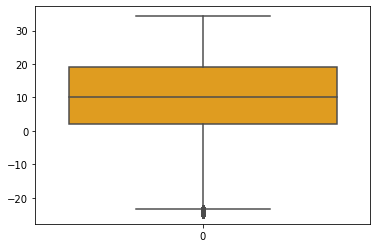

In [82]:
sns.boxplot(data = weather['temperature'], color='orange')

In [83]:
weather.describe()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,10.412186,0.664085,9.253444,9.035212,1016.301625,6.649936,202.356843,38.694013
std,10.618782,0.194389,1.611186,12.237731,7.895185,3.982716,106.520474,19.087939
min,-24.800000,0.130000,0.270000,-35.600000,986.400000,0.000000,0.000000,-27.240000
25%,2.094444,0.510000,9.420000,-0.505556,1011.290000,3.660000,148.000000,24.600000
50%,10.177778,0.680000,10.000000,10.177778,1016.530000,5.930000,208.000000,39.030000
75%,19.033333,0.840000,10.000000,19.033333,1021.480000,8.940000,295.000000,54.790000
max,34.288889,0.980000,10.000000,38.400000,1042.460000,22.910000,359.000000,75.490000


In [84]:
weather['month']= pd.DatetimeIndex(weather['date']).month

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
weather_jan=weather[weather['month']==3]

In [86]:
weather_jan.describe()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint,month
count,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000,44640.0
mean,5.790768,0.604991,9.303026,3.699953,1015.347720,7.807045,197.737321,28.377751,3.0
std,6.354054,0.193884,1.607282,7.653913,8.036515,4.371290,108.906820,13.037227,0.0
min,-7.444444,0.170000,0.980000,-13.800000,990.400000,0.530000,0.000000,-2.010000,3.0
25%,1.461111,0.460000,9.590000,-1.400000,1010.130000,4.680000,108.000000,17.660000,3.0
50%,5.555556,0.600000,10.000000,3.083333,1016.480000,7.230000,203.000000,30.510000,3.0
75%,9.538889,0.770000,10.000000,8.066667,1021.330000,10.140000,296.000000,36.710000,3.0
max,25.400000,0.960000,10.000000,25.400000,1030.150000,22.850000,359.000000,58.370000,3.0
